In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

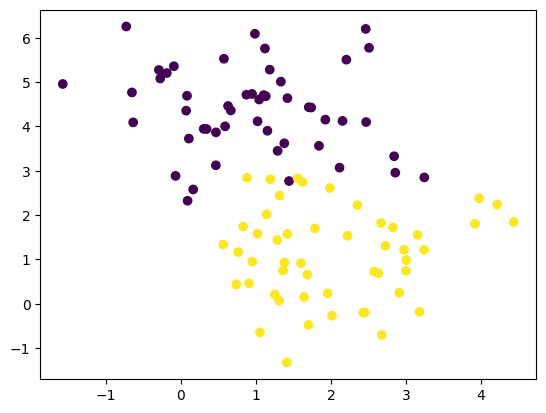

In [22]:
X, y = make_blobs(100, 2, centers=2, random_state=0)
y = y.reshape(len(y), 1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [23]:
def init (X):
    return np.random.randn(len(X[1]), 1), np.random.randn()

W, b = init(X)
print(W, b)

[[-0.07859491]
 [ 0.75651758]] -0.021461031306918267


In [24]:
def model(X, W, b):
    Z= X.dot(W) + b
    return 1 / (1 + np.exp(-Z))

A = model(X, W, b)

In [25]:
def log_loss(A, y):
    return - 1 / len(y) * np.sum(y * np.log(A) + (1-y) * np.log(1 - A))

l_l = log_loss(A, y)
print(l_l)

1.8646343248075874


In [26]:
def gradients(X, y, A):
    D = A - y
    dw = 1 / len(y) * np.dot(X.T, D)
    db = 1 / len(y) * np.sum(D)
    return dw, db

dw, db = gradients(X, y, A)
print(dw, db)

[[0.07915936]
 [1.96570293]] 0.29488212815857223


In [27]:
def accuracy(y, y_pred):
    # print(y_pred)
    # print(y - y_pred)
    # print(abs(y - y_pred))
    return 1 - np.sum(np.abs(y - y_pred)) / len(y)

In [28]:
def predict(X, W, b):
    return X.dot(W) + b >= 0.5

[[ 1.08861786]
 [-1.864255  ]] 3.0951975946513928
0.92


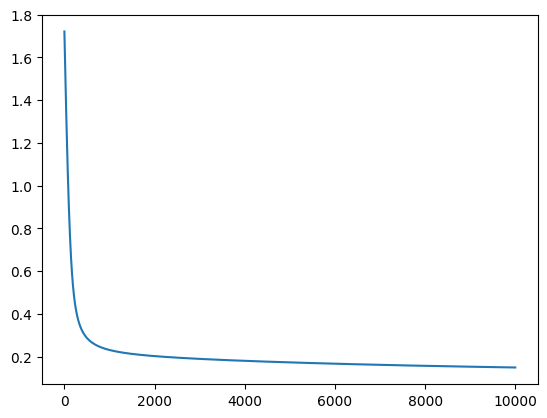

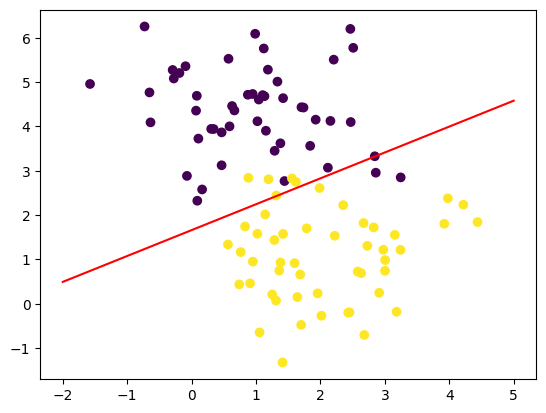

In [ ]:
def perceptron(X, y, learn_rate = 0.01, n_iter = 10000)):
    W, b = init(X)
    errors = []
    for _ in range(n_iter):
        A = model(X, W, b)
        l_l = log_loss(A, y)
        errors.append(l_l)
        dw, db = gradients(X, y, A)
        W -= learn_rate * dw
        b -= learn_rate * db

    return W, b, errors

W, b, errors = perceptron(X, y)
print(W, b)
y_pred = predict(X, W, b)
print(accuracy(y, y_pred))

plt.plot(np.arange(len(errors)), errors)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
x_plot = np.linspace(-2, 5, 1000)
plt.plot(x_plot, (-b - W[0] * x_plot) / W[1], c='red')
